In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ba = xr.load_dataset("ba_clip.nc").rio.write_crs(3035)
ndvi_dif = xr.load_dataset("ndvi_dif.nc").rio.write_crs(3035)

In [9]:
#clip
xmin,xmax,ymin,ymax=387,413,410,430 
ba = ba.isel(x=slice(xmin,xmax),y=slice(ymin,ymax))
ndvi_dif = ndvi_dif.isel(x=slice(xmin,xmax),y=slice(ymin,ymax))

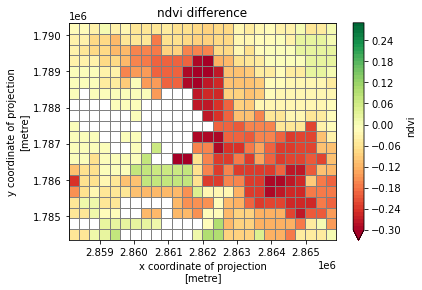

In [24]:
ndvi_dif.ndvi.plot(levels = list(np.arange(-0.3,0.3,0.01)),colors="RdYlGn", color="Grey")
plt.title("ndvi difference")
plt.show()

In [43]:
#mask ndvi difference data (== burn severity) by known/detected burned areas (processed by DLR)
#all burned and no burned areas pos+neg
burnedarea_pn = ndvi_dif.ndvi.where(ba.burned_bin >= 0)

#only burned areas (key 1 in binarized burned area data (1 burned 0 no burned))
burnedarea_p = ndvi_dif.ndvi.where(ba.burned_bin == 1) 

#mask binarized burned area by available ndvi difference data
ba_binarized = ba.burned_bin.where(ndvi_dif.ndvi,drop=True)
# ba_binarized = ba.burned_bin.where(ndvi_dif.ndvi !=np.nan,drop=True) #no change

## problem
burned area masked by ndvi difference - values 0 of ndvi difference are masked but np.nan still not

at the same time: the masking of ndvi difference by burned area mask works correctly

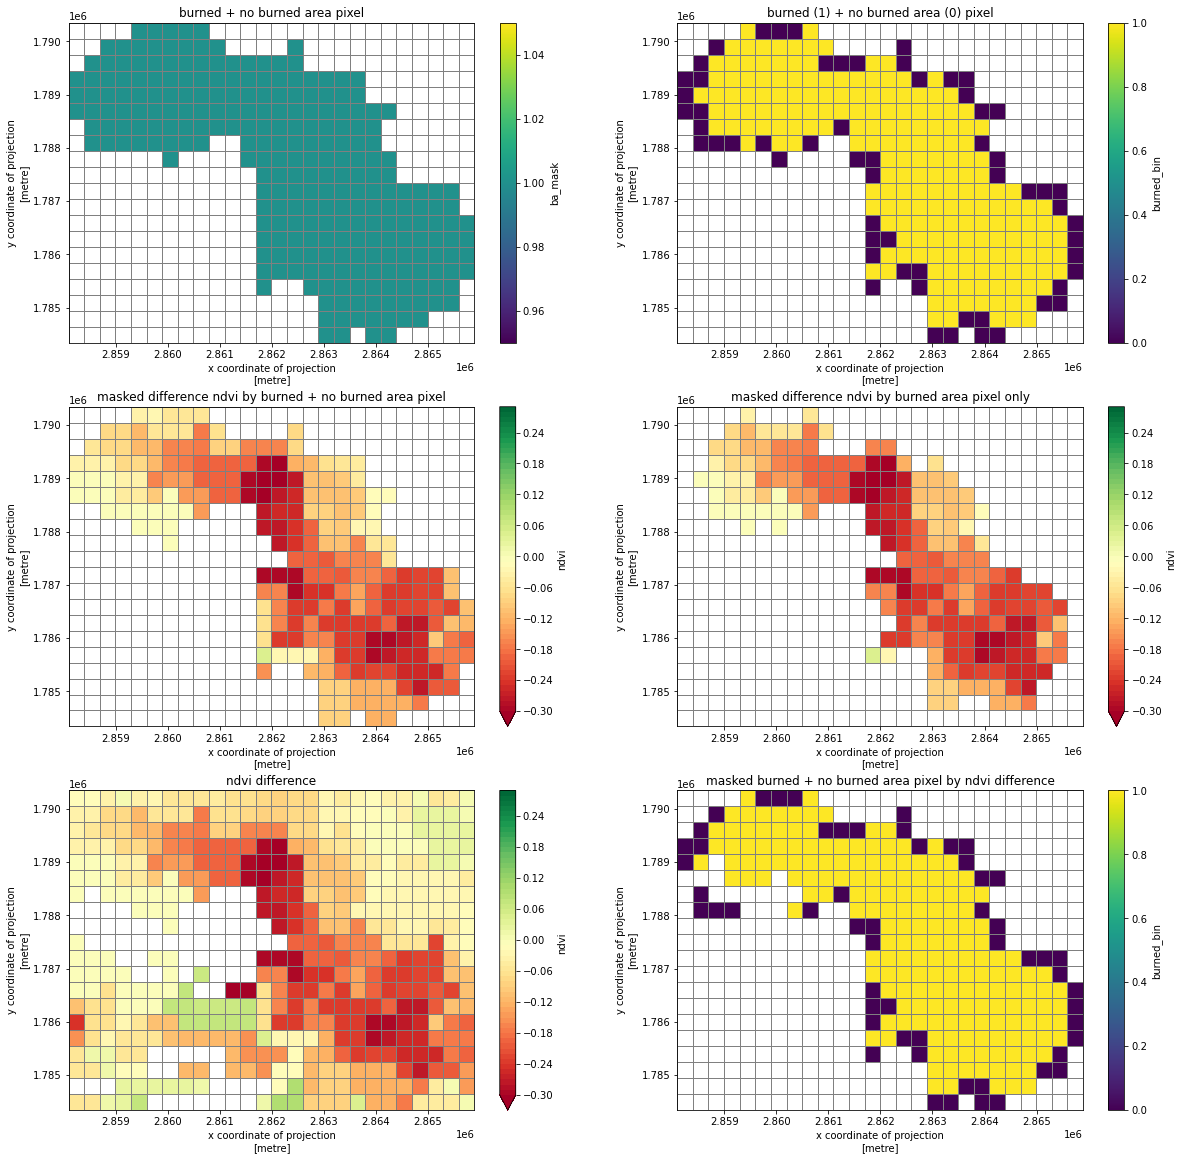

In [44]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,20))

ba.ba_mask.plot(ax=ax1, color="Grey")
ax1.set_title("burned + no burned area pixel")

ba.burned_bin.plot(ax=ax2, color="Grey")
ax2.set_title("burned (1) + no burned area (0) pixel")

burnedarea_pn.plot(ax=ax3,levels = list(np.arange(-0.3,0.3,0.01)),colors="RdYlGn", color="Grey")
ax3.set_title("masked difference ndvi by burned + no burned area pixel")

burnedarea_p.plot(ax=ax4,levels = list(np.arange(-0.3,0.3,0.01)),colors="RdYlGn", color="Grey")
ax4.set_title("masked difference ndvi by burned area pixel only")

ndvi_dif.ndvi.plot(ax=ax5,levels = list(np.arange(-0.3,0.3,0.01)),colors="RdYlGn",color="Grey")
ax5.set_title("ndvi difference")

ba_binarized.plot(ax=ax6,color="Grey") 
ax6.set_title("masked burned + no burned area pixel by ndvi difference")

plt.show()

In [33]:
print(ba.ba_mask.count().values) #should equal burnedarea_pn
print(ba.burned_bin.count().values) #should equal burnedarea_pn
print(burnedarea_pn.count().values) 
print(burnedarea_p.count().values)
print(ba.burned_bin.where(ndvi_dif.ndvi,drop=True).count().values) 

256
256
242
191
241
